<a href="https://colab.research.google.com/github/shreya3134/deep_learning/blob/main/homepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
14,2250,3,101.0
19,800,1,32.0
17,1540,3,60.0
16,1180,3,48.0
2,1440,3,62.0


In [7]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [8]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [9]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [10]:
np.ones(shape=(2))

array([1., 1.])

In [11]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [13]:
w=np.ones(shape=(2))

In [15]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [25]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b #w1*area+w2*bedrooms

    w_grad= -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad= -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(y_true-y_predicted)

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b,cost, cost_list, epoch_list # Removed cost from the return statement

w, b,cost,cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500) # Removed cost from the assignment

In [26]:
w,b,cost

(array([0.70712464, 0.67456527]),
 -0.23034857438407427,
 array([0.00267845, 0.00393225, 0.00165946, 0.00128198, 0.01102582,
        0.00025678, 0.00026276, 0.00066711, 0.00958825, 0.0229604 ,
        0.0003846 , 0.00162577, 0.0033046 , 0.00229551, 0.0025605 ,
        0.00197442, 0.00656565, 0.00639045, 0.00473539, 0.05313366]))

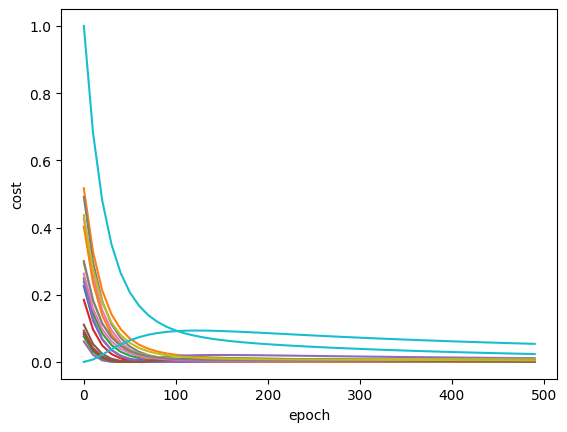

In [27]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [33]:
def predict(area, bedroom, w, b):
  scaled_X=sx.transform([[area,bedroom]])[0]
  scaled_price=w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [41]:
predict(1400,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


66.18682072700953

In [44]:
import random
random.randint(0,6)

3

In [48]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.1):
  number_of_features = X.shape[1]
  w = np.ones(shape=(number_of_features))
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  epoch_list = []

  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = X[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w, sample_x.T) + b #w1*area+w2*bedrooms

    w_grad= -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad= -(2/total_samples)*np.sum(sample_y-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.square(sample_y-y_predicted)

    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)
  return w, b,cost, cost_list, epoch_list

w_sgd, b_sgd,cost_sgd,cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w_sgd,b_sgd,cost_sgd

(array([0.75512736, 0.72544033]), -0.2754920704346075, 0.0018227060585501017)

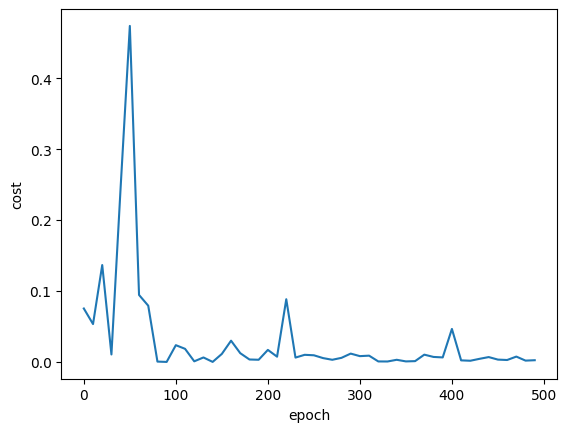

In [49]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [50]:
predict(1400,3,w_sgd,b_sgd)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


64.86728098593352